In [2]:
import pandas as pd

In [3]:
#1. Load the dataset and display the first 10 rows.
path="/content/drive/MyDrive/Dataset/WHR-2024-5CS037.csv"
df=pd.read_csv(path)
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [4]:
#2. Identify the number of rows and columns in the dataset.
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 143
Number of columns: 9


In [5]:
#3. List all the columns and their data types.
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [6]:
#Basic Statistics:

#1. Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_dev_score = df['score'].std()

print(f"Mean of 'score': {mean_score}")
print(f"Median of 'score': {median_score}")
print(f"Standard Deviation of 'score': {std_dev_score}")


Mean of 'score': 5.52758041958042
Median of 'score': 5.785
Standard Deviation of 'score': 1.1707165099442995


In [7]:
#2. Identify the country with the highest and lowest happiness scores.

# Finding the index of the row with the highest score and lowest score
highest_score_index = df['score'].idxmax()
lowest_score_index = df['score'].idxmin()

highest_score_country = df.loc[highest_score_index, 'Country name']
highest_score_value = df.loc[highest_score_index, 'score']

lowest_score_country = df.loc[lowest_score_index, 'Country name']
lowest_score_value = df.loc[lowest_score_index, 'score']

print(f"Country with the highest happiness score: {highest_score_country}: {highest_score_value}")
print(f"Country with the lowest happiness score: {lowest_score_country}: {lowest_score_value}")




Country with the highest happiness score: Finland: 7.741
Country with the lowest happiness score: Afghanistan: 1.721


In [8]:
#Missing Values:

#1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [9]:
#Filtering and Sorting:

#1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df = df[df['score'] > 7.5]

high_score_countries = filtered_df[['Country name', 'score']]

print("Countries with a Score greater than 7.5:")
print(high_score_countries)


Countries with a Score greater than 7.5:
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [10]:
#2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.

#Now Sorting the filtered dataset by 'GDP per Capita' in descending order
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)

top_10_df = sorted_df.head(10)
pd.set_option('display.max_rows', 20)


print("Top 10 countries sorted by GDP per Capita (Descending Order):")
print(top_10_df)


Top 10 countries sorted by GDP per Capita (Descending Order):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [11]:
#Adding New Columns:

#1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
#Low − (Score < 4)
#medium − (4 ≤ Score ≤ 6)
#High − (Score > 6)

# Defining the function to categorize the scores
def categorize_score(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

# Creating a new column 'Happiness Category' based on the 'score' column
df['Happiness_Category'] = df['score'].apply(categorize_score)

print(df[['Country name', 'score', 'Happiness_Category']])

         Country name  score Happiness_Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


<ipython-input-12-177a8e5f066e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


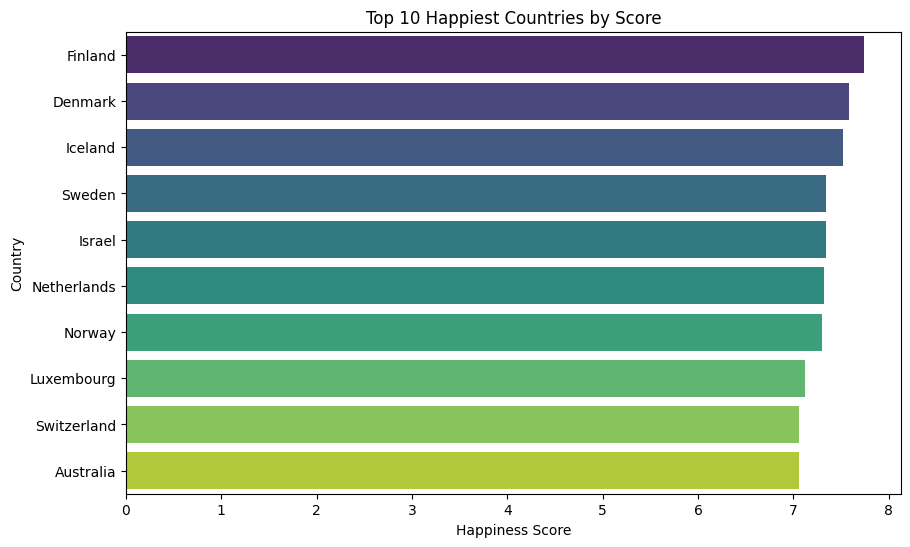

In [12]:
#2. Data Visualizations:
# Bar Plot: Plot the top 10 happiest countries by Score using a bar chart

import matplotlib.pyplot as plt
import seaborn as sns

#First Sorting the first top 10 happiest countries:
top_10_happiest = df.sort_values(by='score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


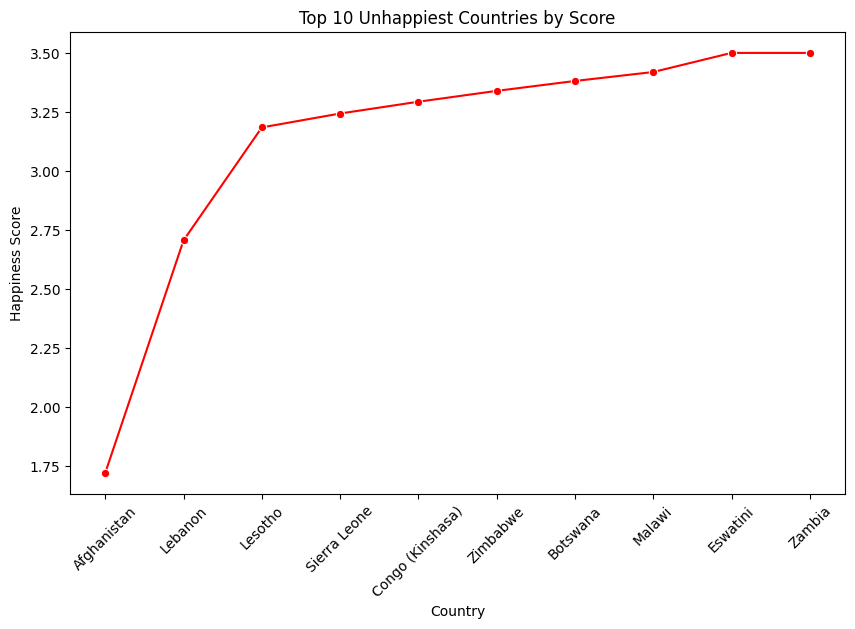

In [13]:
#Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.
#Sorting the 10 most unhappiest countries
top_10_unhappiest = df.sort_values(by='score', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

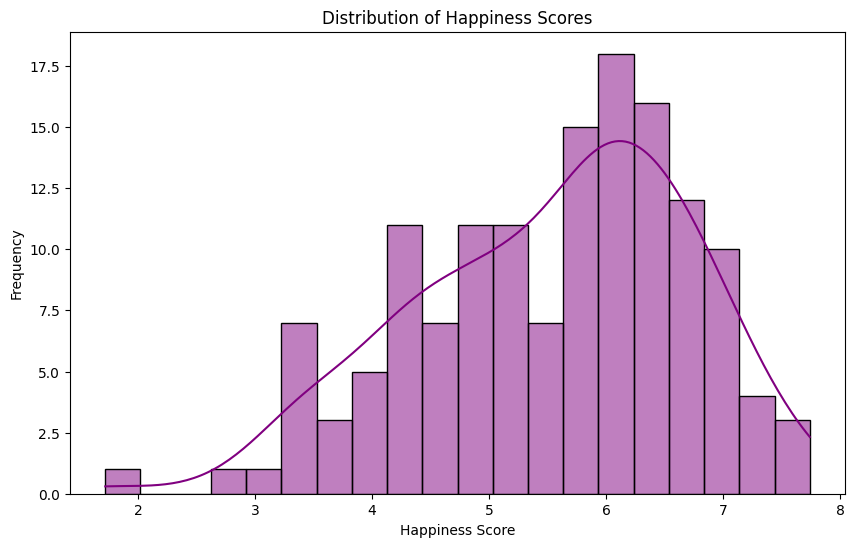

In [14]:
#Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=20, kde=True, color='purple')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt

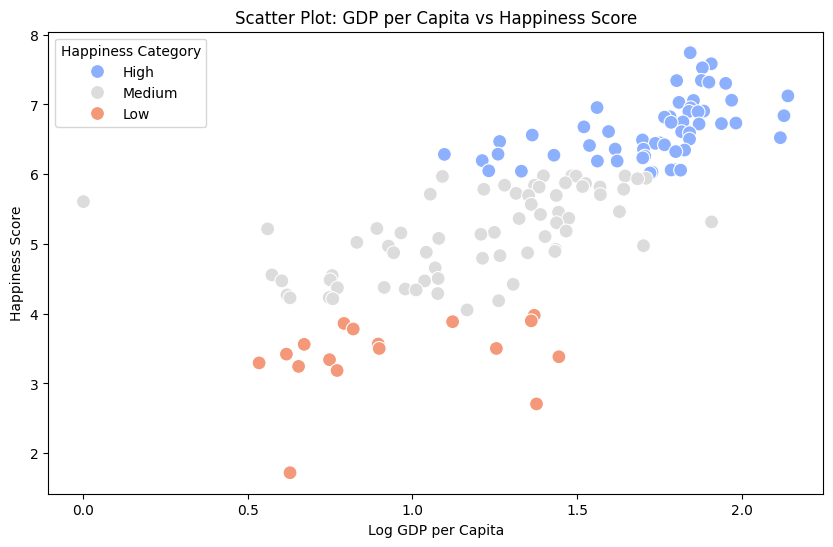

In [15]:
#Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness_Category', palette='coolwarm', s=100)

plt.title('Scatter Plot: GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')

plt.legend(title='Happiness Category')
plt.show()


In [16]:
#1. Define the countries in South Asia with a list
#2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asian_df = df[df['Country name'].isin(south_asian_countries)]

print("Filtered Dataset for South Asian Countries:")
print(south_asian_df.to_string(index=False))


#3: Save the filtered dataset to a CSV file
output_file_path = '/content/drive/MyDrive/Dataset/south_asian_countries.csv'
south_asian_df.to_csv(output_file_path, index=False)

print(f"The filtered dataset has been saved to {output_file_path}")


Filtered Dataset for South Asian Countries:
Country name  score  Log GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption  Dystopia + residual Happiness_Category
       Nepal  5.158               0.965           0.990                    0.443                         0.653       0.209                      0.115                1.783             Medium
    Pakistan  4.657               1.069           0.600                    0.321                         0.542       0.144                      0.074                1.907             Medium
       India  4.054               1.166           0.653                    0.417                         0.767       0.174                      0.122                0.756             Medium
   Sri Lanka  3.898               1.361           1.179                    0.586                         0.583       0.144                      0.031                0.014                Low
  Bang

In [17]:
#1 Using the SouthAsia DataFrame, create a new column called Composite Score that combines the following metrics: Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
# Ensuring the South Asian DataFrame is ready (creating a copy explicitly)
south_asian_df = df[df['Country name'].isin(south_asian_countries)].copy()

#Computing the Composite Score
south_asian_df['Composite Score'] = (
    0.40 * south_asian_df['Log GDP per capita'] +
    0.30 * south_asian_df['Social support'] +
    0.30 * south_asian_df['Healthy life expectancy']
)

# Resetting the index value of the columns
south_asian_df.reset_index(drop=True, inplace=True)

print("South Asian DataFrame with Composite Score:")
print(south_asian_df[['Country name', 'Composite Score']])



South Asian DataFrame with Composite Score:
  Country name  Composite Score
0        Nepal           0.8159
1     Pakistan           0.7039
2        India           0.7874
3    Sri Lanka           1.0739
4   Bangladesh           0.6774
5  Afghanistan           0.3238


In [18]:
#2. Rank the South Asian countries based on the Composite Score in descending order.
south_asian_df_sortedByComposite = south_asian_df.sort_values(by='Composite Score', ascending=False)

print("South Asian Countries Ranked by Composite Score (Descending Order):")
print(south_asian_df_sortedByComposite[['Country name', 'Composite Score']].to_string(index=False))



South Asian Countries Ranked by Composite Score (Descending Order):
Country name  Composite Score
   Sri Lanka           1.0739
       Nepal           0.8159
       India           0.7874
    Pakistan           0.7039
  Bangladesh           0.6774
 Afghanistan           0.3238


Text(0.5, 1.0, 'Top 5 South Asian Countries by Composite Score')

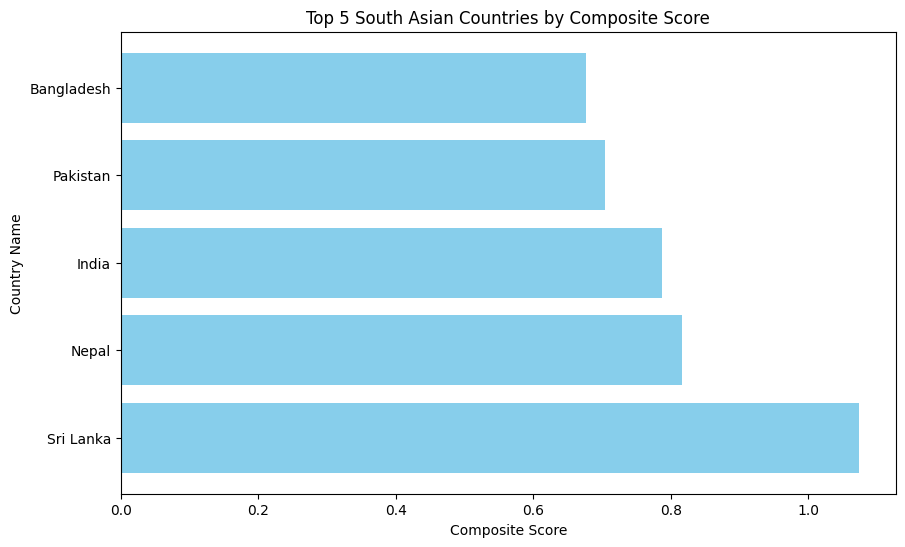

In [19]:
#3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

top5_south_asian_countries = south_asian_df_sortedByComposite.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top5_south_asian_countries['Country name'], top5_south_asian_countries['Composite Score'], color='skyblue')

plt.xlabel('Composite Score')
plt.ylabel('Country Name')
plt.title('Top 5 South Asian Countries by Composite Score')

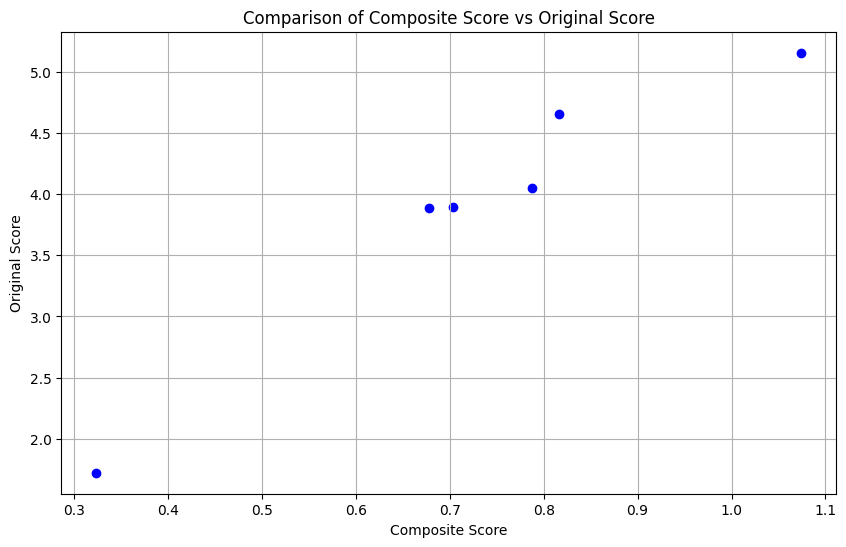

In [20]:
#4. Discuss whether the rankings based on the Composite Score align with the original Score - support your discussion with some visualization plot.

#sorting the countries based on original score
south_asian_df_sortedByScore = south_asian_df.sort_values(by='score', ascending=False)

#plotting and comparing them using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(south_asian_df_sortedByComposite['Composite Score'], south_asian_df_sortedByScore['score'], color='blue')

plt.title('Comparison of Composite Score vs Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')

# Show the plot
plt.grid(True)
plt.show()




So as we can see in the scatter plot it seems that as the composite score increases the original happiness score also increases. This upward trend between these two data shows us that they have a positive relationship between them which indicates us that once a country's composite score increases it will also increase thier happiness score.

In [21]:
#Tasks:
#1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
#2. Define outliers using the 1.5 × IQR rule.#

# Calculating  Q1 (25th percentile) and Q3 (75th percentile) for Score and GDP per Capita
Q1_score = south_asian_df['score'].quantile(0.25)
Q3_score = south_asian_df['score'].quantile(0.75)
IQR_score = Q3_score - Q1_score

Q1_gdp = south_asian_df['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_df['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Defining lower and upper bounds for Score and GDP per Capita using the 1.5 * IQR rule
lower_bound_score = Q1_score - 1.5 * IQR_score
upper_bound_score = Q3_score + 1.5 * IQR_score

lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Identifying outliers for Score and GDP per Capita
outliers_score = south_asian_df[(south_asian_df['score'] < lower_bound_score) | (south_asian_df['score'] > upper_bound_score)]
outliers_gdp = south_asian_df[(south_asian_df['Log GDP per capita'] < lower_bound_gdp) | (south_asian_df['Log GDP per capita'] > upper_bound_gdp)]

print("Outlier Countries based on Score:")
print(outliers_score[['Country name', 'score']])

print("\nOutlier Countries based on GDP per Capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])


Outlier Countries based on Score:
  Country name  score
5  Afghanistan  1.721

Outlier Countries based on GDP per Capita:
  Country name  Log GDP per capita
5  Afghanistan               0.628


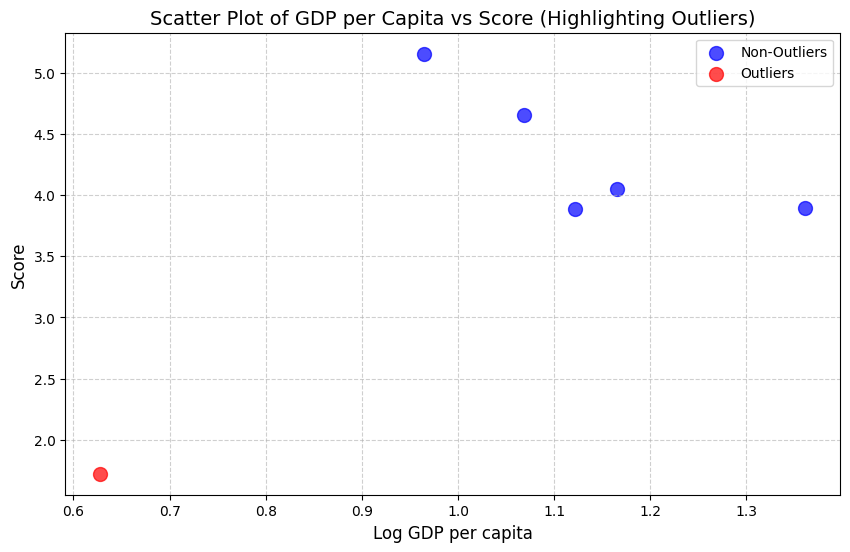

In [22]:
#3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers in a different color.
# Defiing the outliers for Score and GDP per Capita
outliers = south_asian_df[
    (south_asian_df['score'] < 1.978) |
    (south_asian_df['Log GDP per capita'] < 0.6635)
]

# Definig non-outliers
non_outliers = south_asian_df[
    ~((south_asian_df['score'] < 1.978) |
      (south_asian_df['Log GDP per capita'] < 0.6635))
]

plt.figure(figsize=(10, 6))

plt.scatter(non_outliers['Log GDP per capita'], non_outliers['score'],
            color='blue', label='Non-Outliers', s=100, alpha=0.7)

plt.scatter(outliers['Log GDP per capita'], outliers['score'],
            color='red', label='Outliers', s=100, alpha=0.7)

plt.xlabel('Log GDP per capita', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Scatter Plot of GDP per Capita vs Score (Highlighting Outliers)', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

plt.show()


#4. Discuss the characteristics of these outliers and their potential impact on regional averages.

With the above scatter plot we can understand that Afghanistan has the lowest score (1.721) and lowesst GDP per Capita(0.628). It has also the lowest healthy life expectancy.

From this we can understand that due to Afghanistan's low happiness score it brings down the average happiness score of south asian countries making the south asian countries less hapier than as it seems to be. Also its low GDP per Capita impacts the perception of economic prosperity in the region when comparing averages globally.





In [23]:
#1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation {pearson correlation} with the Score for South Asian countries.
# Metrics to calculate correlation with Score
chosen_metrics = ["Freedom to make life choices", "Generosity"]

# Calculate Pearson correlations
correlations = {
    metric: south_asian_df['score'].corr(south_asian_df[metric])
    for metric in chosen_metrics
}

for metric, correlation in correlations.items():
    print(f"Pearson correlation between '{metric}' and 'Score': {correlation:.3f}")


Pearson correlation between 'Freedom to make life choices' and 'Score': 0.801
Pearson correlation between 'Generosity' and 'Score': 0.875


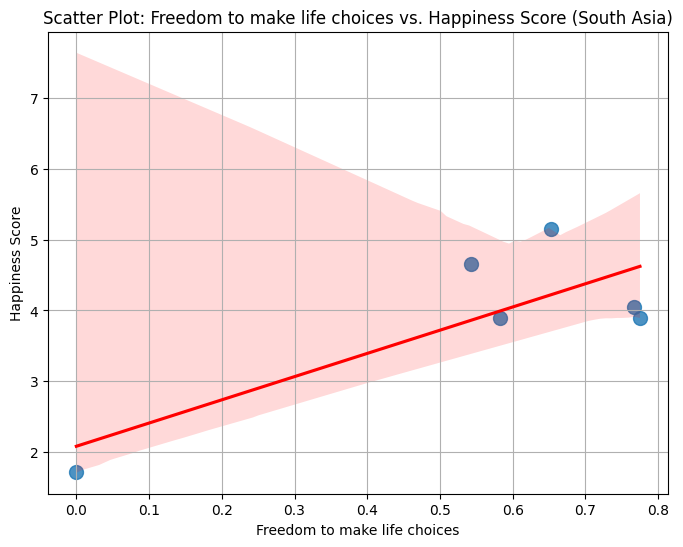

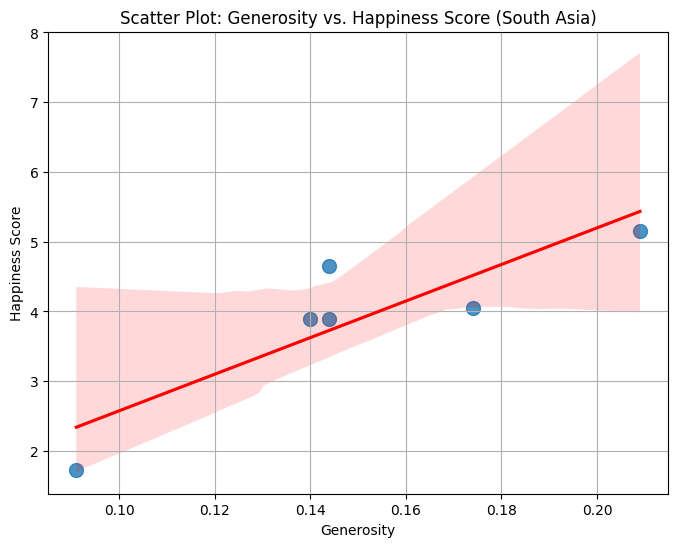

In [24]:
#Create scatter plots with trendlines for these metrics against the Score.
# List of metrics to plot against 'Score'
metrics_to_plot = ["Freedom to make life choices", "Generosity"]

# Create scatter plots with trendlines
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_asian_df, scatter_kws={"s": 100}, line_kws={"color": "red"})
    plt.title(f'Scatter Plot: {metric} vs. Happiness Score (South Asia)')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.grid(True)
    plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

There seems to be positive trend where countries with higher freedom to make life choices tend to have higher happiness scores. The trend line is upward sloping, indicating that as freedom increases so does happiness althought not perfectly due to the spread of data points.

While in generosity vs happiness score the data points are widely scattered, showing no clear trend, suggesting that generosity does not have a strong or let's say consistent relationship with happiness in South Asian countries. The confidenece interval around the regression is broad, indicating high variability and thus inconsistent relationship

In [25]:
#1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score for each South Asian country.
# Create the new column 'GDP-Score Gap'
south_asian_df['GDP-Score Gap'] = south_asian_df['Log GDP per capita'] - south_asian_df['score']

print(south_asian_df[['Country name', 'Log GDP per capita', 'score', 'GDP-Score Gap']])


  Country name  Log GDP per capita  score  GDP-Score Gap
0        Nepal               0.965  5.158         -4.193
1     Pakistan               1.069  4.657         -3.588
2        India               1.166  4.054         -2.888
3    Sri Lanka               1.361  3.898         -2.537
4   Bangladesh               1.122  3.886         -2.764
5  Afghanistan               0.628  1.721         -1.093


In [26]:
#2. Rank the South Asian countries by this gap in both ascending and descending order.
# Rank by GDP-Score Gap in ascending order
ascending_rank = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=True)

# Rank by GDP-Score Gap in descending order
descending_rank = south_asian_df[['Country name', 'GDP-Score Gap']].sort_values(by='GDP-Score Gap', ascending=False)

print("Countries ranked by GDP-Score Gap (Ascending):")
print(ascending_rank.to_string(index=False))

print("\nCountries ranked by GDP-Score Gap (Descending):")
print(descending_rank.to_string(index=False))


Countries ranked by GDP-Score Gap (Ascending):
Country name  GDP-Score Gap
       Nepal         -4.193
    Pakistan         -3.588
       India         -2.888
  Bangladesh         -2.764
   Sri Lanka         -2.537
 Afghanistan         -1.093

Countries ranked by GDP-Score Gap (Descending):
Country name  GDP-Score Gap
 Afghanistan         -1.093
   Sri Lanka         -2.537
  Bangladesh         -2.764
       India         -2.888
    Pakistan         -3.588
       Nepal         -4.193


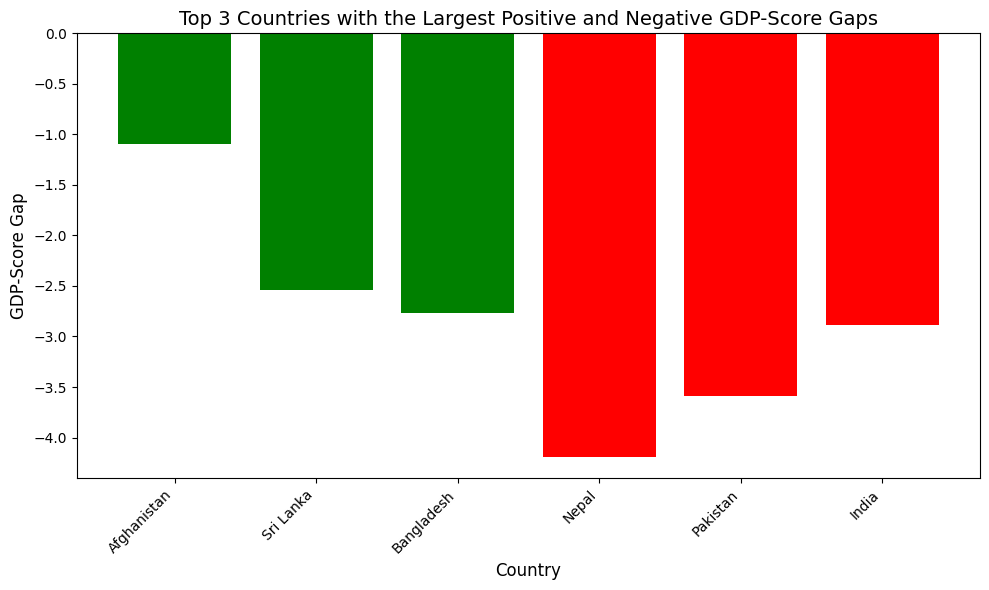

In [40]:
#3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

#top 3 countries with the largest positive GDP-Score Gap (descending order)
top_positive = descending_rank.head(3)

#top 3 countries with the largest negative GDP-Score Gap (ascending order)
top_negative = ascending_rank.head(3)

# Combine both positive and negative gaps for the bar chart
top_gaps = pd.concat([top_positive, top_negative])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_gaps['Country name'], top_gaps['GDP-Score Gap'], color=['green']*3 + ['red']*3)

plt.title('Top 3 Countries with the Largest Positive and Negative GDP-Score Gaps', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP-Score Gap', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


The GDP score gap, showing differences between GDP per capita and happiness scores, highlights the disparity between economic output and well-being in South Asian countries:

Positive Gaps (Afghanistan, Sri Lanka, Bangladesh): High GDP per capita scores but lower happiness, driven by inequality, instability, and governance challenges. Economic growth is not translating into well-being.

Negative Gaps (Nepal, Pakistan, India): Higher happiness despite lower GDP per capita, reflecting strong social support, cultural values, and well-being policies.

Implications:
South Asian countries must balance economic growth with improvements in governance, equality, and quality of life to ensure that GDP gains translate into greater happiness.








In [28]:
#Problem 3 Task 1
#1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the following list: middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]\

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "State of Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]

print(middle_east_df.to_string(index=False))


        Country name  score  Log GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption  Dystopia + residual Happiness_Category
              Israel  7.341               1.803           1.513                    0.740                         0.641       0.153                      0.193                2.298               High
              Kuwait  6.951               1.845           1.364                    0.661                         0.827       0.200                      0.172                1.884               High
United Arab Emirates  6.733               1.983           1.164                    0.563                         0.815       0.209                      0.258                1.741               High
        Saudi Arabia  6.594               1.842           1.361                    0.511                         0.787       0.114                      0.188                1.790               High
          

In [29]:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# • Which region has higher happiness Scores on average?

# Calculating the mean and standard deviation of the score for South Asia
south_asia_mean = south_asian_df['score'].mean()
south_asia_std = south_asian_df['score'].std()

# Calculating the mean and standard deviation of the score for the Middle East
middle_east_mean = middle_east_df['score'].mean()
middle_east_std = middle_east_df['score'].std()

print(f"South Asia - Mean Happiness Score: {south_asia_mean:.2f}")
print(f"South Asia - Standard Deviation: {south_asia_std:.2f}")
print(f"Middle East - Mean Happiness Score: {middle_east_mean:.2f}")
print(f"Middle East - Standard Deviation: {middle_east_std:.2f}")

# Determining which region has a higher average happiness score
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
elif middle_east_mean > south_asia_mean:
    print("The Middle East has a higher average happiness score.")
else:
    print("Both regions have the same average happiness score.")

South Asia - Mean Happiness Score: 3.90
South Asia - Standard Deviation: 1.18
Middle East - Mean Happiness Score: 5.36
Middle East - Standard Deviation: 1.49
The Middle East has a higher average happiness score.


In [30]:
#2. Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.

# Identifying the top 3 and bottom 3 countries in South Asia
south_asia_top_3 = south_asian_df.nlargest(3, 'score')
south_asia_bottom_3 = south_asian_df.nsmallest(3, 'score')

# Identifying the top 3 and bottom 3 countries in the Middle East
middle_east_top_3 = middle_east_df.nlargest(3, 'score')
middle_east_bottom_3 = middle_east_df.nsmallest(3, 'score')

print("Top 3 Countries in South Asia:")
print(south_asia_top_3[['Country name', 'score']].to_string(index=False))
print("\nBottom 3 Countries in South Asia:")
print(south_asia_bottom_3[['Country name', 'score']].to_string(index=False))

print("\nTop 3 Countries in the Middle East:")
print(middle_east_top_3[['Country name', 'score']].to_string(index=False))
print("\nBottom 3 Countries in the Middle East:")
print(middle_east_bottom_3[['Country name', 'score']].to_string(index=False))



Top 3 Countries in South Asia:
Country name  score
       Nepal  5.158
    Pakistan  4.657
       India  4.054

Bottom 3 Countries in South Asia:
Country name  score
 Afghanistan  1.721
  Bangladesh  3.886
   Sri Lanka  3.898

Top 3 Countries in the Middle East:
        Country name  score
              Israel  7.341
              Kuwait  6.951
United Arab Emirates  6.733

Bottom 3 Countries in the Middle East:
Country name  score
     Lebanon  2.707
       Yemen  3.561
      Jordan  4.186


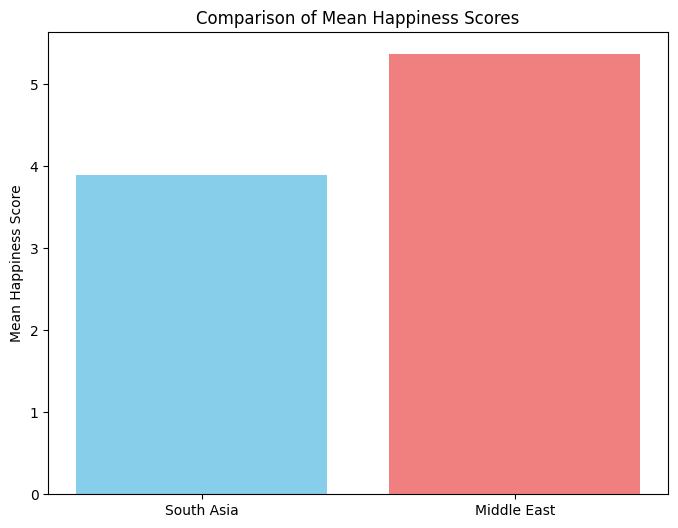

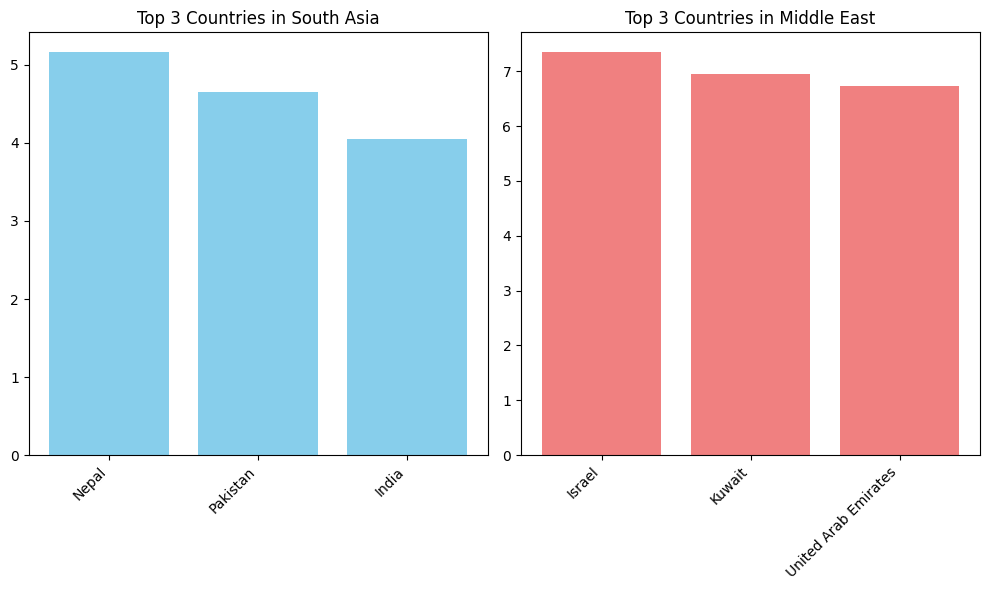

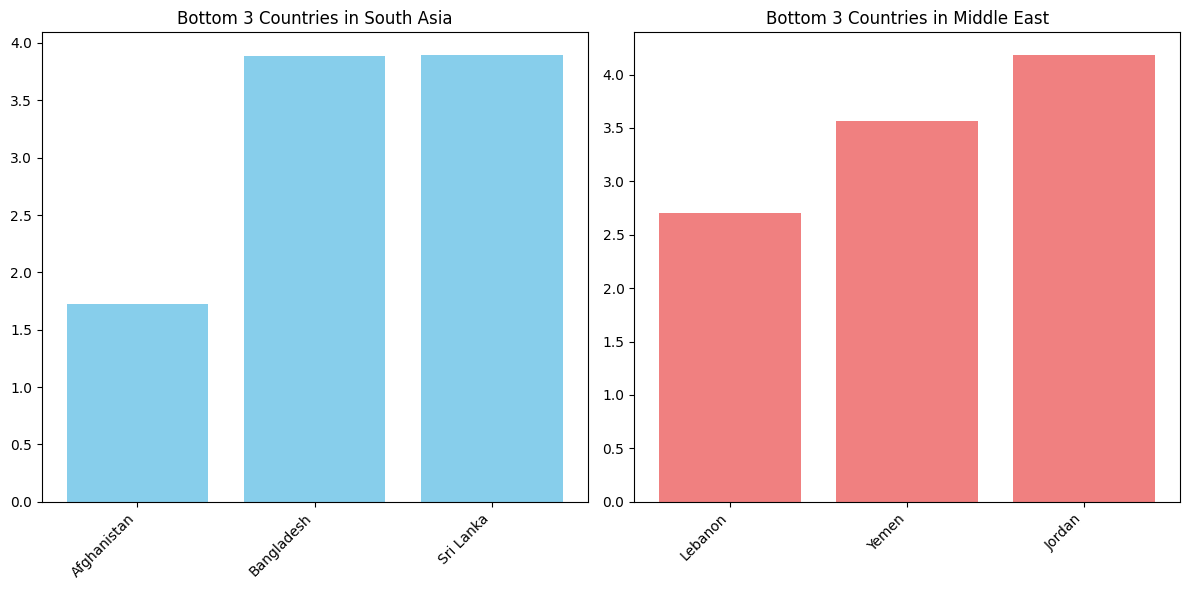

In [31]:

# Plotting bar charts for comparison

# Bar chart comparing mean happiness scores
regions = ['South Asia', 'Middle East']
means = [south_asia_mean, middle_east_mean]

plt.figure(figsize=(8, 6))
plt.bar(regions, means, color=['skyblue', 'lightcoral'])
plt.title('Comparison of Mean Happiness Scores')
plt.ylabel('Mean Happiness Score')
plt.show()

# Bar chart comparing top 3 countries in each region
top_countries_south_asia = south_asia_top_3['Country name'].tolist()
top_scores_south_asia = south_asia_top_3['score'].tolist()

top_countries_middle_east = middle_east_top_3['Country name'].tolist()
top_scores_middle_east = middle_east_top_3['score'].tolist()


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(top_countries_south_asia, top_scores_south_asia, color='skyblue')
plt.title('Top 3 Countries in South Asia')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(top_countries_middle_east, top_scores_middle_east, color='lightcoral')
plt.title('Top 3 Countries in Middle East')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Bar chart comparing bottom 3 countries in each region
bottom_countries_south_asia = south_asia_bottom_3['Country name'].tolist()
bottom_scores_south_asia = south_asia_bottom_3['score'].tolist()

bottom_countries_middle_east = middle_east_bottom_3['Country name'].tolist()
bottom_scores_middle_east = middle_east_bottom_3['score'].tolist()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bottom_countries_south_asia, bottom_scores_south_asia, color='skyblue')
plt.title('Bottom 3 Countries in South Asia')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.bar(bottom_countries_middle_east, bottom_scores_middle_east, color='lightcoral')
plt.title('Bottom 3 Countries in Middle East')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

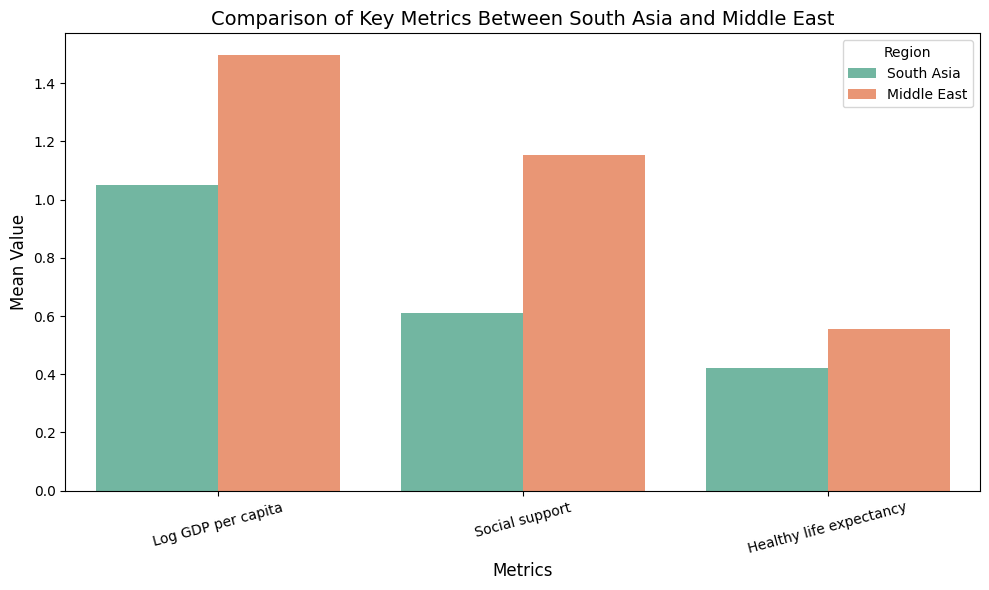

In [32]:
#3. Metric Comparisons:
# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

# Calculating mean values for the metrics in each region
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

# Calculating means for each region
south_asia_means = south_asian_df[metrics].mean()
middle_east_means = middle_east_df[metrics].mean()

# Creating a DataFrame for visualization
comparison_df = pd.DataFrame({
    'Metric': metrics,
    'South Asia': south_asia_means.values,
    'Middle East': middle_east_means.values
})

# Reshapping the DataFrame for Seaborn
comparison_melted = comparison_df.melt(id_vars='Metric', var_name='Region', value_name='Mean Value')

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melted, x='Metric', y='Mean Value', hue='Region', palette='Set2')

plt.title('Comparison of Key Metrics Between South Asia and Middle East', fontsize=14)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Region')
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()


As we can see from the bar chart, the metric with the largest disparity between the two regions is GDP per Capita. The Middle east has significantly higher mean value compared to South Asia for this metric

In [33]:
#Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

# Making a Function to calculate coefficient of variation
def coefficient_of_variation(series):
    return (series.std() / series.mean()) * 100  # CV in percentage

# Calculating range and CV for South Asia
south_asia_score_range = south_asian_df['score'].max() - south_asian_df['score'].min()
south_asia_score_cv = coefficient_of_variation(south_asian_df['score'])

# Calculating range and CV for Middle East
middle_east_score_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_score_cv = coefficient_of_variation(middle_east_df['score'])

print(f"South Asia - Range of Score: {south_asia_score_range:.2f}")
print(f"South Asia - Coefficient of Variation (CV): {south_asia_score_cv:.2f}%")
print(f"Middle East - Range of Score: {middle_east_score_range:.2f}")
print(f"Middle East - Coefficient of Variation (CV): {middle_east_score_cv:.2f}%")


South Asia - Range of Score: 3.44
South Asia - Coefficient of Variation (CV): 30.21%
Middle East - Range of Score: 4.63
Middle East - Coefficient of Variation (CV): 27.86%



The Middle East has higher variability in happiness because its range of scores (4.63) is greater than that of South Asia (3.44). The range indicates the absolute spread between the highest and lowest happiness scores, and a larger range reflects greater variability in the distribution of happiness scores.

In [34]:
#5. Correlation Analysis:
#• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.

# Calculating correlation for South Asia
south_asia_correlations = south_asian_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Calculating correlation for Middle East
middle_east_correlations = middle_east_df[['score', 'Freedom to make life choices', 'Generosity']].corr()

# Extract relevant correlations
south_asia_score_corr = south_asia_correlations.loc['score', ['Freedom to make life choices', 'Generosity']]
middle_east_score_corr = middle_east_correlations.loc['score', ['Freedom to make life choices', 'Generosity']]

print("South Asia - Correlation with Score:")
print(south_asia_score_corr)

print("\nMiddle East - Correlation with Score:")
print(middle_east_score_corr)


South Asia - Correlation with Score:
Freedom to make life choices    0.800519
Generosity                      0.874512
Name: score, dtype: float64

Middle East - Correlation with Score:
Freedom to make life choices    0.863220
Generosity                      0.627524
Name: score, dtype: float64


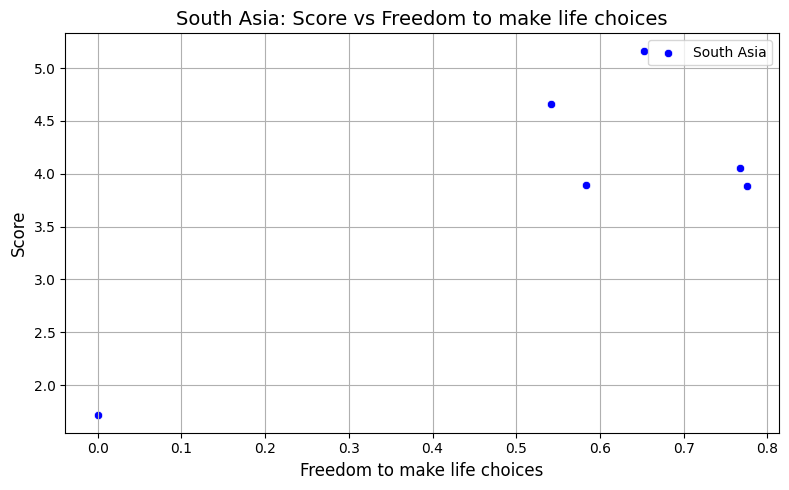

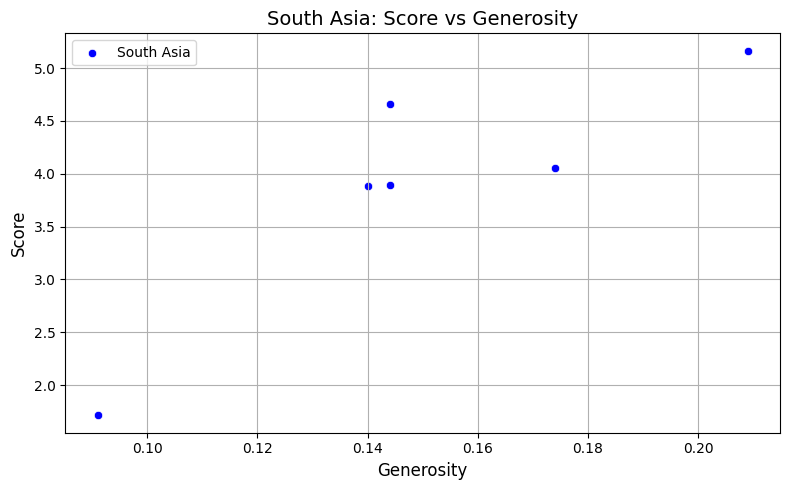

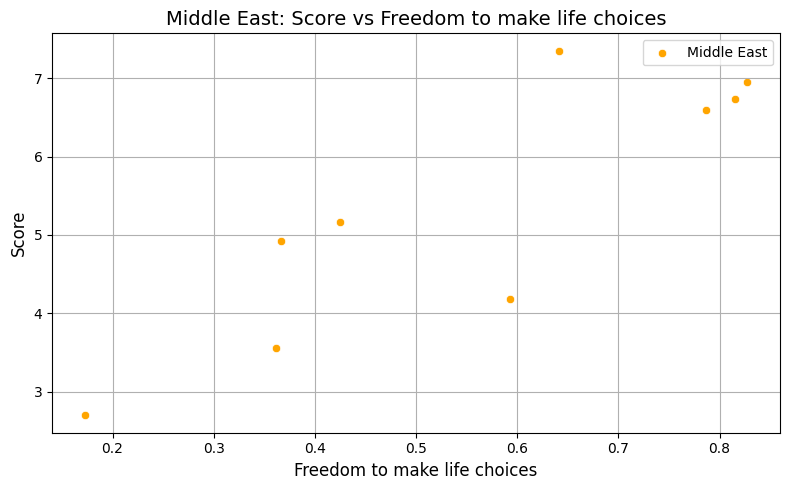

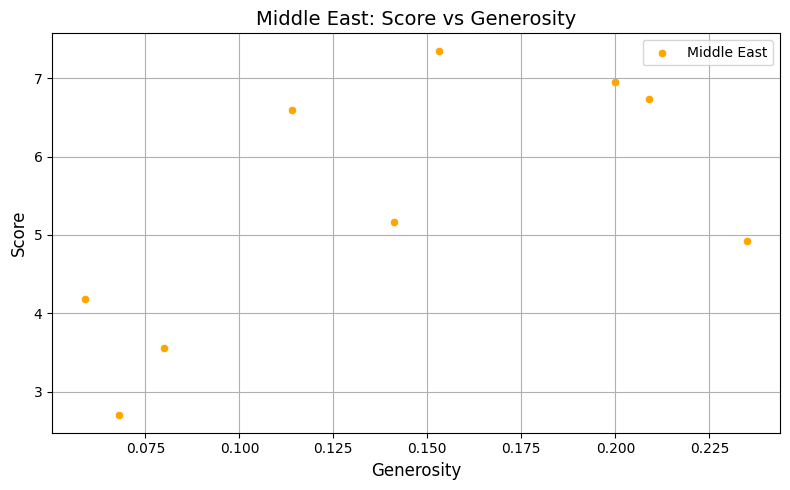

In [35]:
#Create scatter plots to visualize and interpret the relationships.

# Defining the metrics to analyze
metrics_to_plot = ['Freedom to make life choices', 'Generosity']

# Creating scatter plots for South Asia
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=south_asian_df, x=metric, y='score', color='blue', label='South Asia')
    plt.title(f'South Asia: Score vs {metric}', fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Creating scatter plots for Middle East
for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=middle_east_df, x=metric, y='score', color='orange', label='Middle East')
    plt.title(f'Middle East: Score vs {metric}', fontsize=14)
    plt.xlabel(metric, fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [36]:
#6. Outlier Detection:
#• Identify outlier countries in both regions based on Score and GDP per Capita.

def detect_outliers(df, column):
    """Identifying outliers in a dataframe column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detecting outliers in South Asia based on Score and Log GDP per capita
south_asia_outliers_score = detect_outliers(south_asian_df, 'score')
south_asia_outliers_gdp = detect_outliers(south_asian_df, 'Log GDP per capita')

# Detecting outliers in Middle East based on Score and Log GDP per capita
middle_east_outliers_score = detect_outliers(middle_east_df, 'score')
middle_east_outliers_gdp = detect_outliers(middle_east_df, 'Log GDP per capita')

print("South Asia - Outliers based on Score:")
print(south_asia_outliers_score[['Country name', 'score']])
print("\nSouth Asia - Outliers based on Log GDP per capita:")
print(south_asia_outliers_gdp[['Country name', 'Log GDP per capita']])

print("\nMiddle East - Outliers based on Score:")
print(middle_east_outliers_score[['Country name', 'score']])
print("\nMiddle East - Outliers based on Log GDP per capita:")
print(middle_east_outliers_gdp[['Country name', 'Log GDP per capita']])


South Asia - Outliers based on Score:
  Country name  score
5  Afghanistan  1.721

South Asia - Outliers based on Log GDP per capita:
  Country name  Log GDP per capita
5  Afghanistan               0.628

Middle East - Outliers based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East - Outliers based on Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


From the above data we can confirm that middle east has no outlier while in South asia Afghanistan is an outlier in both score and GDP per capita

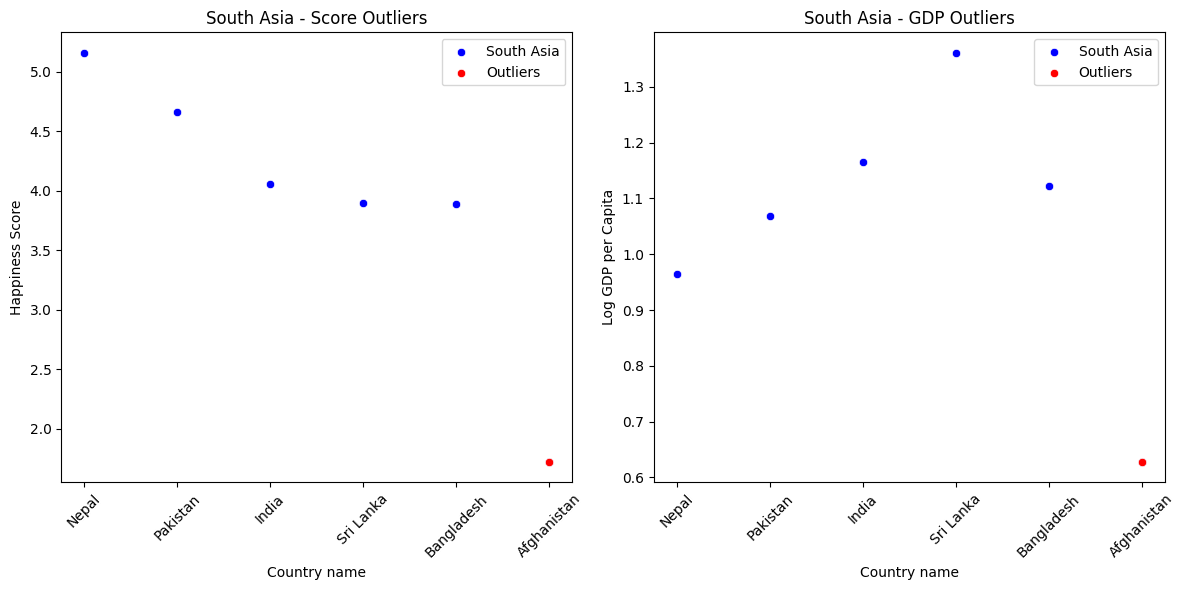

In [37]:

# Scatter plot for South Asia
plt.figure(figsize=(12, 6))

# South Asia - Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=south_asian_df, x='Country name', y='score', color='blue', label='South Asia')
sns.scatterplot(data=south_asia_outliers_score, x='Country name', y='score', color='red', label='Outliers')
plt.title('South Asia - Score Outliers')
plt.xticks(rotation=45)
plt.ylabel('Happiness Score')
plt.legend()

# South Asia - Log GDP per Capita
plt.subplot(1, 2, 2)
sns.scatterplot(data=south_asian_df, x='Country name', y='Log GDP per capita', color='blue', label='South Asia')
sns.scatterplot(data=south_asia_outliers_gdp, x='Country name', y='Log GDP per capita', color='red', label='Outliers')
plt.title('South Asia - GDP Outliers')
plt.xticks(rotation=45)
plt.ylabel('Log GDP per Capita')
plt.legend()

plt.tight_layout()
plt.show()


From the above graph we can again understand that Afghanistan is an outlier in south Asia and is facing huge economic challenges, this implies that Afghanistan should focus on its development aimed at boosting their economic growth. Due to the challenges they are facing we can clearly visualize the impact it has on the country's happiness score. Contrast to other South Asian Countries Afghanistan seems to be in a bad state.

<ipython-input-38-0a99bfcce556>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=region_data, x='Region', y='score', palette='Set2')


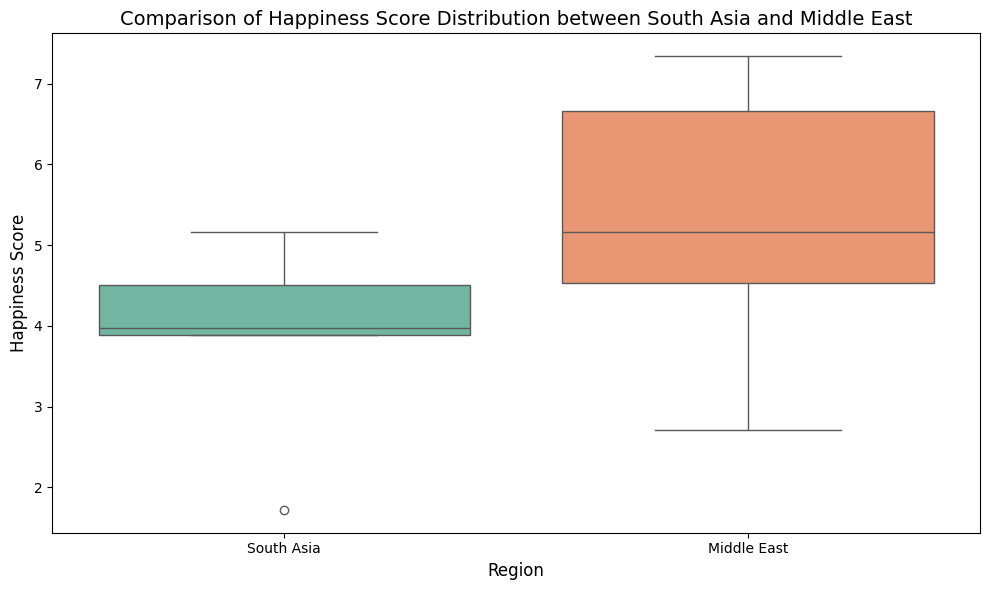

In [38]:
#7. Visualization:
#• Create boxplots comparing the distribution of Score between South Asia and the Middle East.

# Combining the data for the two regions
region_data = pd.concat([
    south_asian_df[['Country name', 'score']].assign(Region='South Asia'),
    middle_east_df[['Country name', 'score']].assign(Region='Middle East')
])

# Creating the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=region_data, x='Region', y='score', palette='Set2')

plt.title('Comparison of Happiness Score Distribution between South Asia and Middle East', fontsize=14)
plt.ylabel('Happiness Score', fontsize=12)
plt.xlabel('Region', fontsize=12)

plt.tight_layout()
plt.show()



The Middle East shows a wider spread of happiness scores, indicating more variability in the region.
South Asia's scores are more concentrated in the lower range, suggesting less variability.

The median score for the Middle East is higher than that of South Asia, indicating that, on average, Middle Eastern countries report higher happiness scores.

South Asia has a clear outlier (Afghanistan) with a significantly lower score compared to the rest of the region.
The Middle East does not have any visible outliers in its happiness scores.
These differences highlight the varying levels of happiness within and between the two regions, influenced by economic, social, and political factors.






